In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA - 1

In [3]:
df = pd.read_csv(r'C:\Users\hetvi\Downloads\BIKE DETAILS.csv')

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


## 1) What is the range of selling prices in the dataset?

In [6]:
price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"The range of selling prices is: {price_range}")

The range of selling prices is: 755000


## 2) What is the median selling price for bikes in the dataset?

In [7]:
median_price = df['selling_price'].median()
print(f"The median selling price is: {median_price}")

The median selling price is: 45000.0


## 3) What is the most common seller type?

In [8]:
most_common_seller = df['seller_type'].mode()[0]
print(f"The most common seller type is: {most_common_seller}")

The most common seller type is: Individual


## 4) How many bikes have driven more than 50,000 kilometers?

In [10]:
bikes_more_than_50k = df[df['km_driven'] > 50000].shape[0]
print(f"The number of bikes driven more than 50,000 kilometers is: {bikes_more_than_50k}")

The number of bikes driven more than 50,000 kilometers is: 170


## 5) What is the average km_driven value for each ownership type?

In [11]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("The average km_driven value for each ownership type is:")
print(avg_km_by_owner)

The average km_driven value for each ownership type is:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


## 6) What proportion of bikes are from the year 2015 or older?

In [13]:
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]

proportion_2015_or_older = bikes_2015_or_older / df.shape[0]
print(f"Proportion of bikes from the year 2015 or older: {proportion_2015_or_older:.2f}")

Proportion of bikes from the year 2015 or older: 0.57


 ## 7) What is the trend of missing values across the dataset?

In [14]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100)

print("Missing values per column:")
print(missing_values)

print("\nPercentage of missing values per column:")
print(missing_percentage)

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values per column:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


## 8) What is the highest ex_showroom_price recorded, and for which bike?

In [15]:
highest_ex_showroom_price_bike = df.loc[df['ex_showroom_price'].idxmax()]
print(f"The highest ex_showroom price is {highest_ex_showroom_price_bike['ex_showroom_price']} INR for the bike: {highest_ex_showroom_price_bike['name']}")

The highest ex_showroom price is 1278000.0 INR for the bike: Harley-Davidson Street Bob


## 9) What is the total number of bikes listed by each seller type?

In [20]:
seller_type_count = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller type:")
print(seller_type_count)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


## 10) What is the relationship between selling_price and km_driven for first-owner bikes?

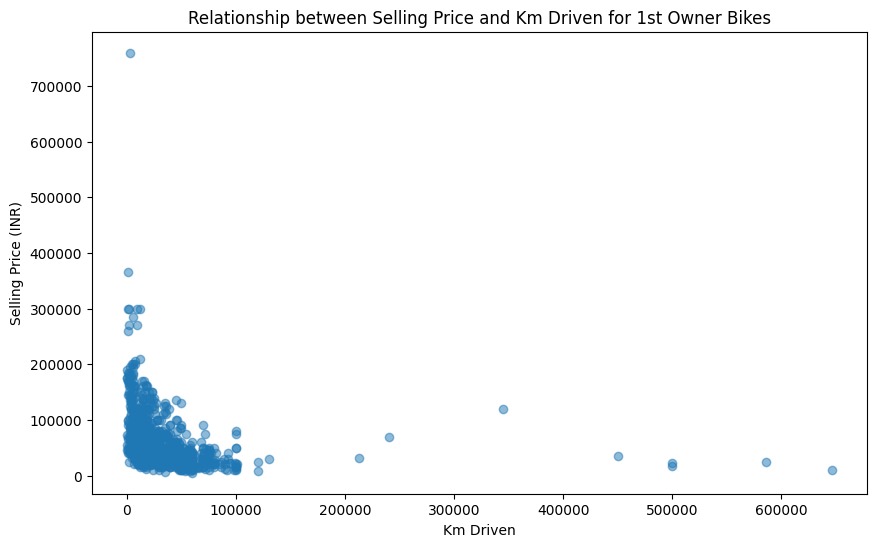

In [21]:
first_owner_bikes = df[df['owner'] == '1st owner']

plt.figure(figsize=(10, 6))
plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'], alpha=0.5)
plt.title('Relationship between Selling Price and Km Driven for 1st Owner Bikes')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price (INR)')
plt.show()

## 11) Identify and remove outliers in the km_driven column using the IQR method.

In [22]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Rows before removing outliers: {df.shape[0]}")
print(f"Rows after removing outliers: {df_no_outliers.shape[0]}")

Rows before removing outliers: 1061
Rows after removing outliers: 1022


## 12) Perform a bivariate analysis to visualize the relationship between year and selling_price.

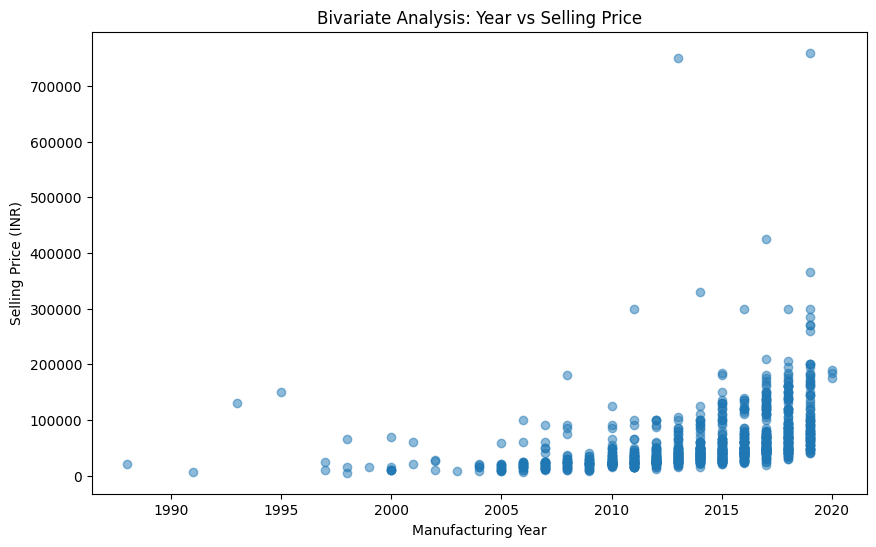

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.5)
plt.title('Bivariate Analysis: Year vs Selling Price')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price (INR)')
plt.show()

## 13) What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [24]:
current_year = 2025
df['bike_age'] = current_year - df['year']

df['depreciation_per_year'] = df['selling_price'] / df['bike_age']

average_depreciation = df['depreciation_per_year'].mean()
print(f"The average depreciation in selling price per year of age is: {average_depreciation:.2f} INR")

The average depreciation in selling price per year of age is: 7001.30 INR


## 14) Which bike names are priced significantly above the average price for their manufacturing year?

In [27]:
avg_price_by_year = df.groupby('year')['selling_price'].mean()

threshold = 1.2
df['avg_price_for_year'] = df['year'].map(avg_price_by_year)
df['price_above_avg'] = df['selling_price'] > threshold * df['avg_price_for_year']

significantly_above_avg = df[df['price_above_avg']]

print("Bikes priced significantly above average for their manufacturing year:")
print(significantly_above_avg[['name', 'year', 'selling_price']])

Bikes priced significantly above average for their manufacturing year:
                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
17                        Yamaha YZF R15 S  2010          40000
...                                    ...   ...            ...
984              Royal Enfield Classic 500  2014          95000
985              Royal Enfield Classic 500  2011          90000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1023                Bajaj Avenger 220 dtsi  2012          45000

[233 rows x 3 columns]


## 15) Develop a correlation matrix for numeric columns and visualize it using a heatmap.

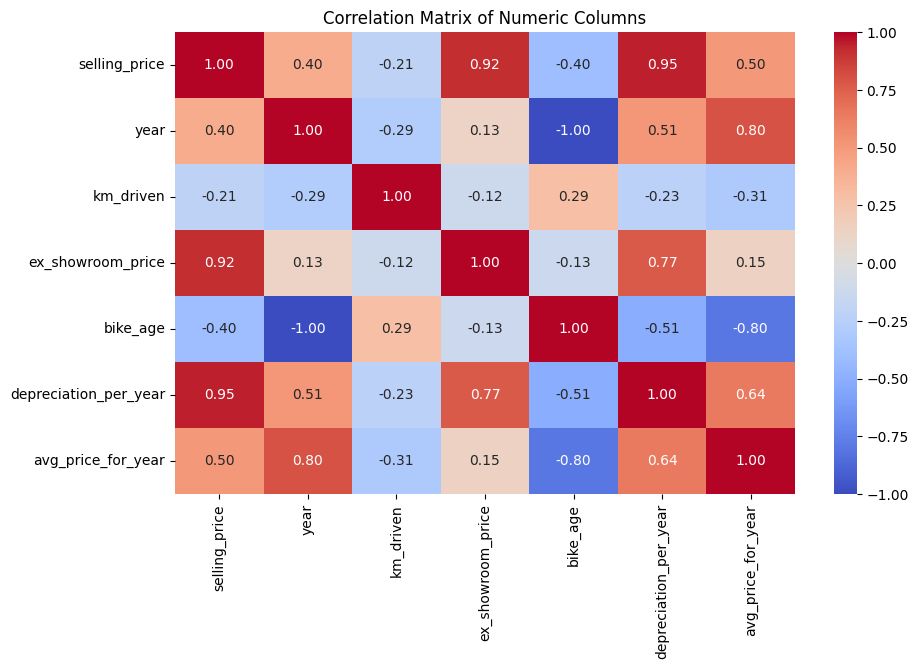

In [30]:
numeric_columns = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


# EDA - 2

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import pandas as pd
df = pd.read_csv(r'C:\Users\hetvi\Downloads\Car Sale.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


## 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [33]:
average_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

average_price_by_dealer

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

## 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [34]:
price_variance_by_brand = df.groupby('Company')['Price ($)'].var().sort_values(ascending=False)

price_variance_by_brand

Company
Lincoln       3.864389e+08
Saab          3.862695e+08
Cadillac      3.809180e+08
Plymouth      3.635123e+08
Lexus         3.187269e+08
Buick         2.938561e+08
Mercury       2.704437e+08
Nissan        2.629024e+08
Saturn        2.556873e+08
Ford          2.511937e+08
Mercedes-B    2.472067e+08
Oldsmobile    2.468464e+08
Toyota        2.361487e+08
BMW           2.269717e+08
Pontiac       2.058928e+08
Infiniti      1.875895e+08
Chevrolet     1.771844e+08
Volvo         1.672829e+08
Subaru        1.669463e+08
Audi          1.665195e+08
Volkswagen    1.569288e+08
Mitsubishi    1.362202e+08
Chrysler      1.341725e+08
Dodge         1.251622e+08
Honda         1.242919e+08
Jaguar        1.045002e+08
Jeep          8.948847e+07
Acura         6.696225e+07
Porsche       2.768695e+07
Hyundai       1.215208e+07
Name: Price ($), dtype: float64

## 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

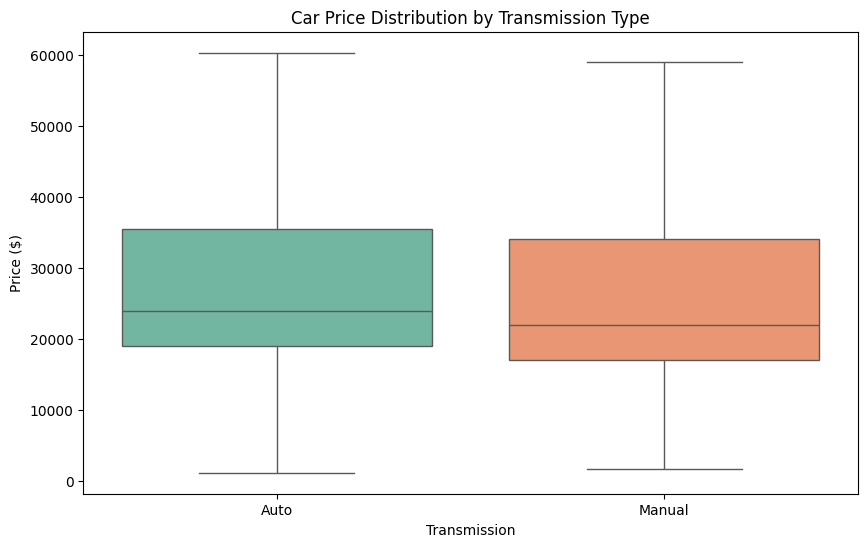

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transmission', y='Price ($)', hue='Transmission', palette='Set2', showfliers=False)

plt.title('Car Price Distribution by Transmission Type')
plt.show()

## 4. What is the distribution of car prices across different regions?

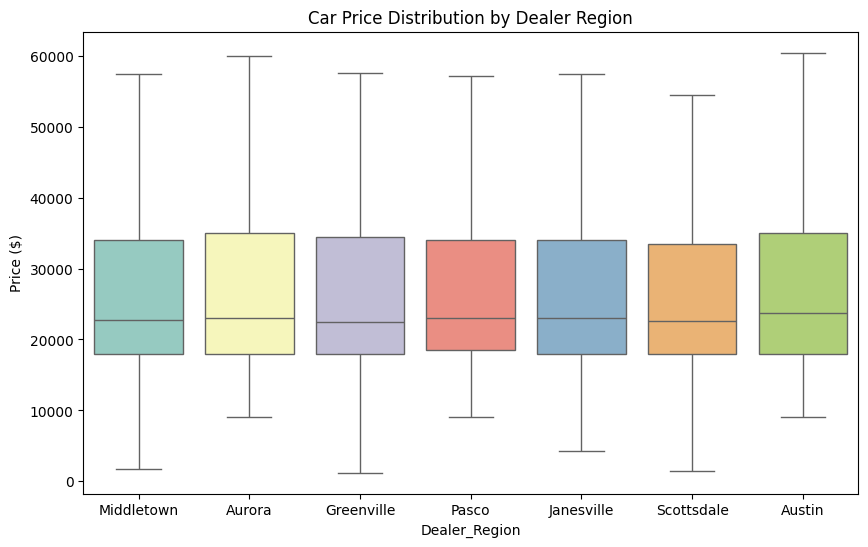

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', hue='Dealer_Region', palette='Set3', showfliers=False)

plt.title('Car Price Distribution by Dealer Region')
plt.show()

## 5) What is the distribution of cars based on body styles?

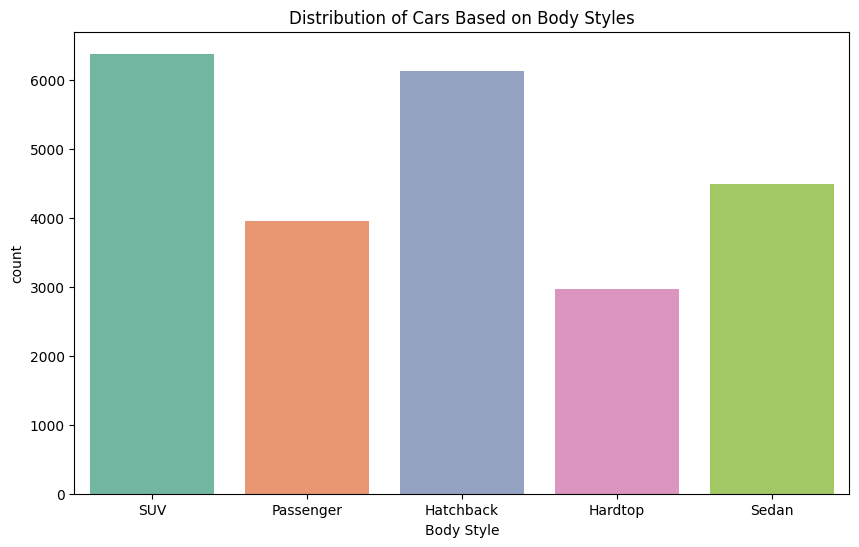

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Body Style', hue='Body Style', palette='Set2', legend=False)
plt.title('Distribution of Cars Based on Body Styles')
plt.show()

## 6) How does the average selling price of cars vary by customer gender and annual income?

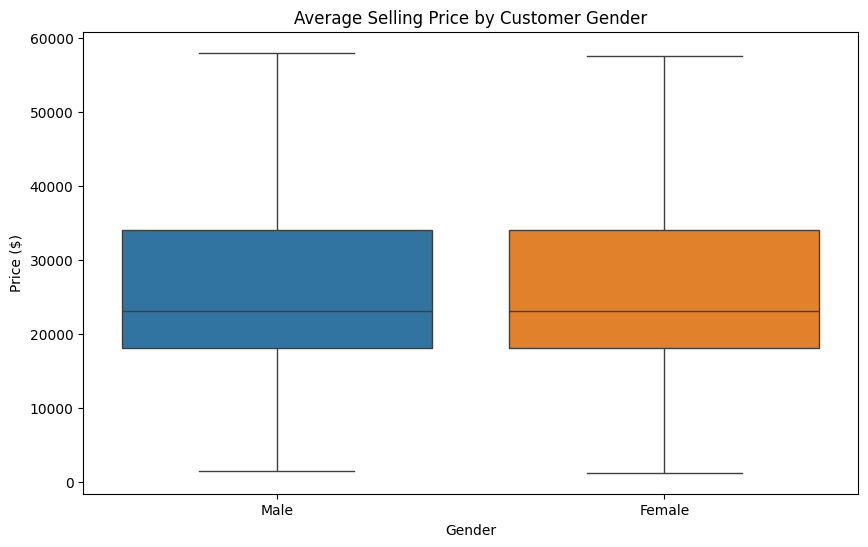

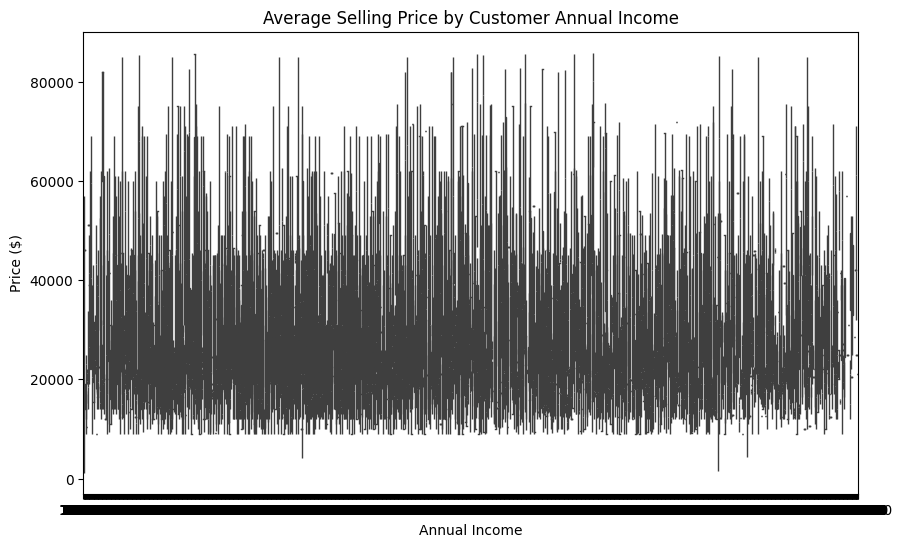

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\hetvi\Downloads\Car Sale.csv')  # Ensure the correct path

# Create the boxplot for gender and price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Price ($)', hue='Gender', showfliers=False)
plt.title('Average Selling Price by Customer Gender')
plt.show()

# Create the boxplot for annual income and price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Annual Income', y='Price ($)', showfliers=False)
plt.title('Average Selling Price by Customer Annual Income')
plt.show()


## 7) What is the distribution of car prices by region, and how does the number of cars sold vary by region?

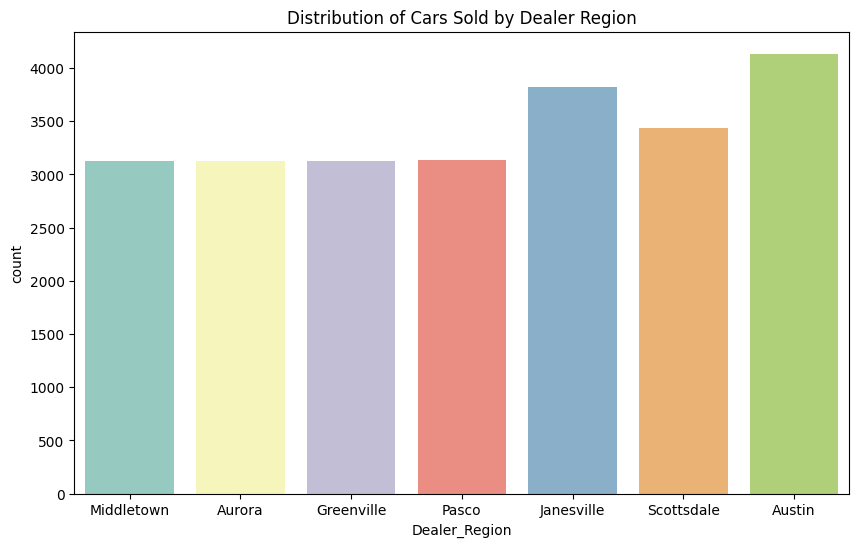

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Dealer Region without palette warning
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dealer_Region', hue='Dealer_Region', palette='Set3', legend=False)
plt.title('Distribution of Cars Sold by Dealer Region')
plt.show()


## 8) How does the average car price differ between cars with different engine sizes?

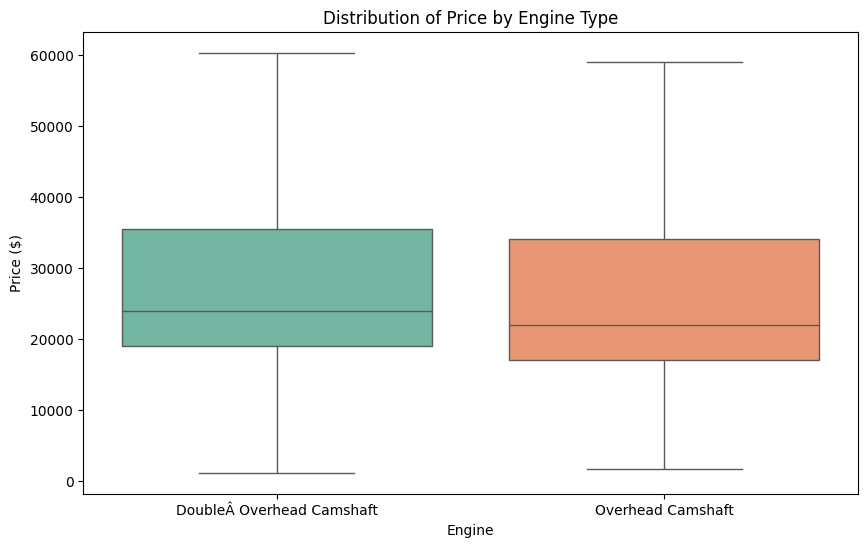

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Engine and Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Engine', y='Price ($)', hue='Engine', palette='Set2', showfliers=False)
plt.title('Distribution of Price by Engine Type')
plt.show()


## 9) How do car prices vary based on the customer’s annual income bracket?

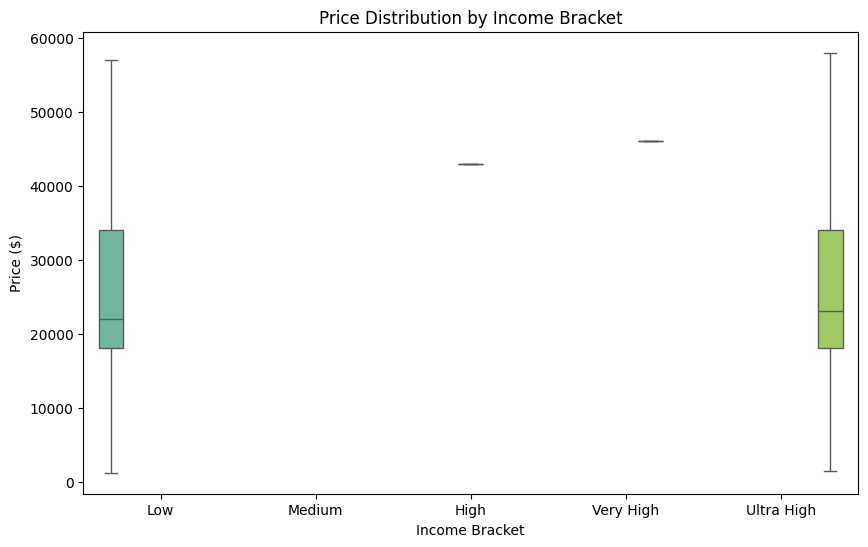

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Income Bracket and Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Income Bracket', y='Price ($)', hue='Income Bracket', palette='Set2', showfliers=False)
plt.title('Price Distribution by Income Bracket')
plt.show()


## 10) What are the top 5 car models with the highest number of sales, and how does their price distribution look?

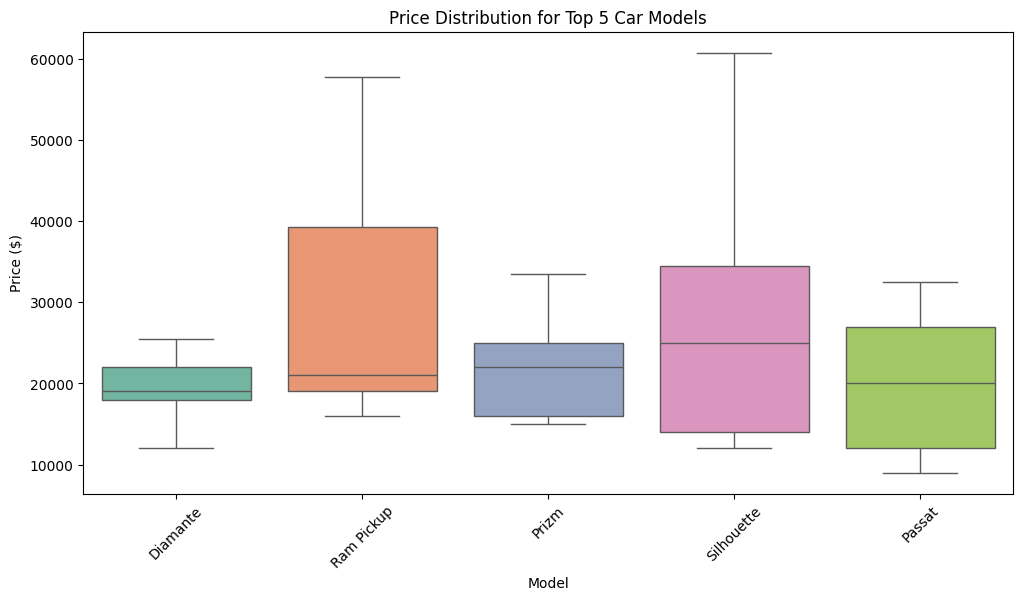

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['Model'].isin(top_models)], x='Model', y='Price ($)', hue='Model', palette='Set2', showfliers=False)
plt.title('Price Distribution for Top 5 Car Models')
plt.xticks(rotation=45)
plt.show()


## 11) How does car price vary with engine size across different car colors, and which colors have the highest price variation?

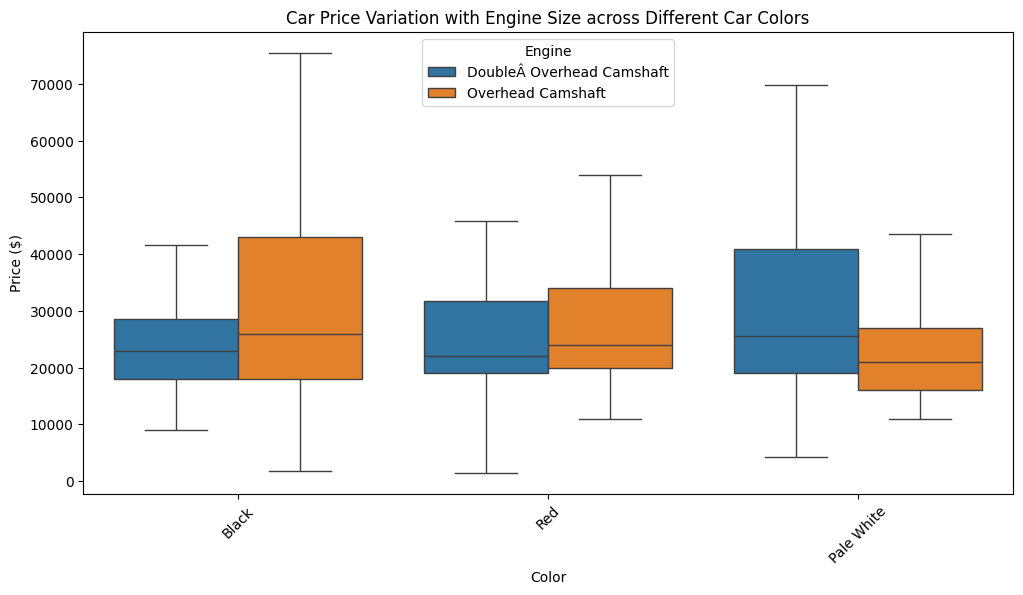

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine', showfliers=False)
plt.title('Car Price Variation with Engine Size across Different Car Colors')
plt.xticks(rotation=45)
plt.show()


## 12) Is there any seasonal trend in car sales based on the date of sale?

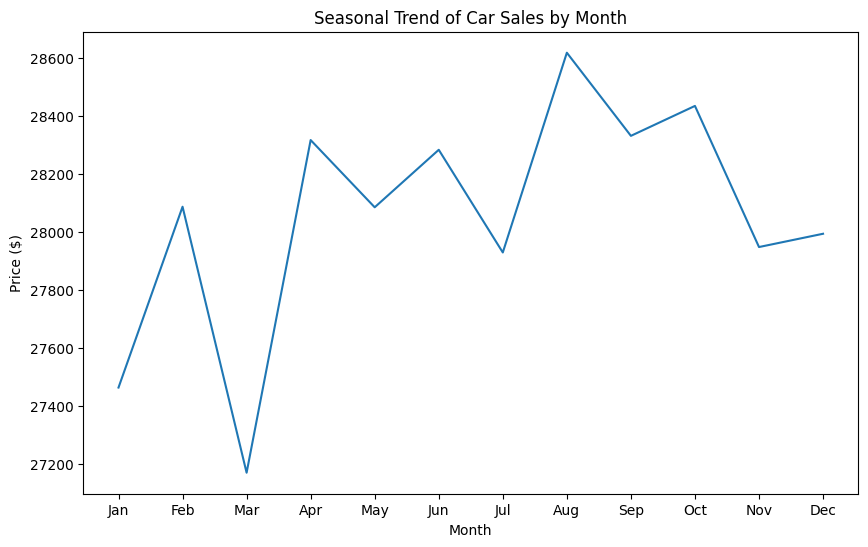

In [19]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Price ($)', errorbar=None)
plt.title('Seasonal Trend of Car Sales by Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


## 13) How does the car price distribution change when considering different combinations of body style and transmission type?

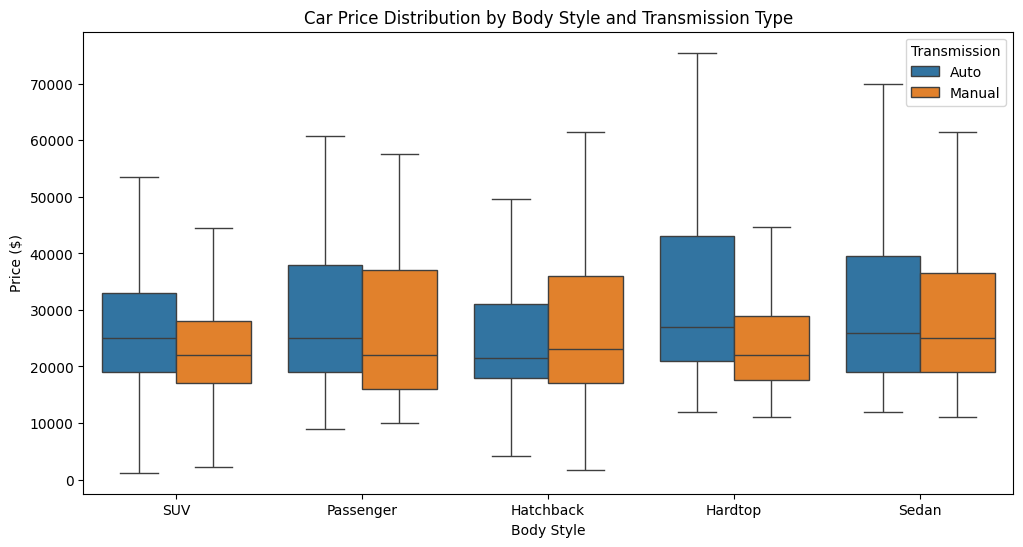

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission', showfliers=False)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.show()

## 14) What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

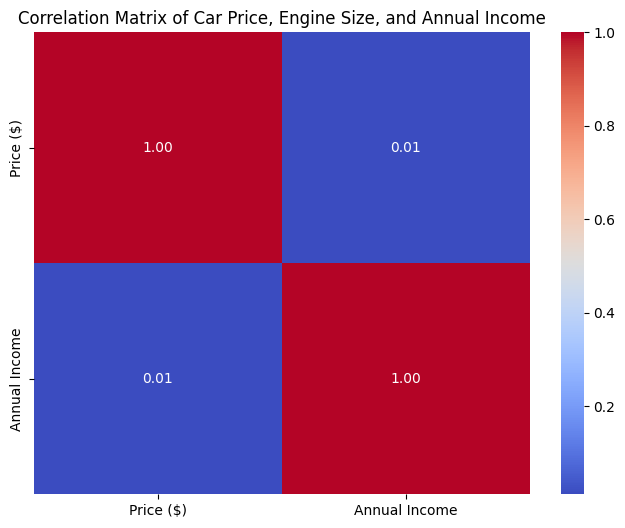

In [23]:
correlation_matrix = df[['Price ($)', 'Annual Income']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Car Price, Engine Size, and Annual Income')
plt.show()

## 15) How does the average car price vary across different car models and engine types?

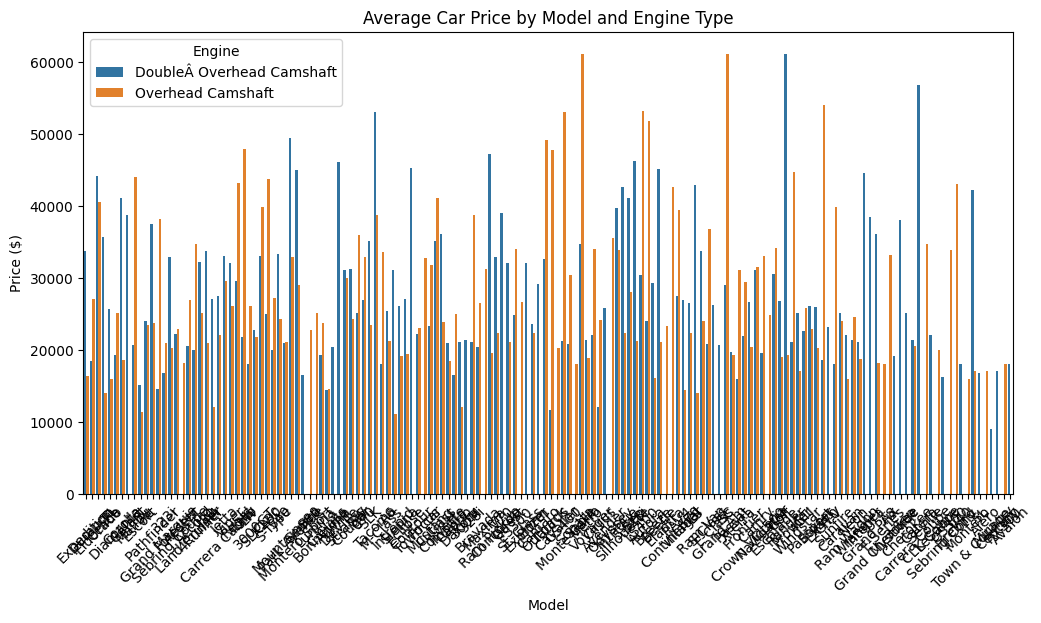

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Model', y='Price ($)', hue='Engine', errorbar=None)
plt.title('Average Car Price by Model and Engine Type')
plt.xticks(rotation=45)
plt.show()


# EDA - 3

In [25]:
import pandas as pd    
import seaborn as sns   
import matplotlib.pyplot as plt  

In [39]:
df = pd.read_csv(r'C:\Users\hetvi\Downloads\amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## 1) What is the average rating for each product category?

In [44]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
avg_rating_by_category = data.groupby('category')['rating'].mean()
print(avg_rating_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

## 2. What are the top rating_count products by category?

In [45]:
top_rating_count_by_category = data.sort_values('rating_count', ascending=False).groupby('category').head(1)
print(top_rating_count_by_category[['category', 'product_name', 'rating_count']])

                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
977   Electronics|Headphones,Earbuds&Accessories|Hea...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
895   Home&Kitchen|CraftMaterials|DrawingMaterials|D...   
941   Computers&Accessories|Printers,Inks&Accessorie...   
526   Electronics|Mobiles&Accessories|MobileAccessor...   
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   

                                           product_name rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
750        Eveready Red 1012 AAA Batteries - Pack of 10          989  
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250  
1059  P

## 3. What is the distribution of discounted prices vs. actual prices?

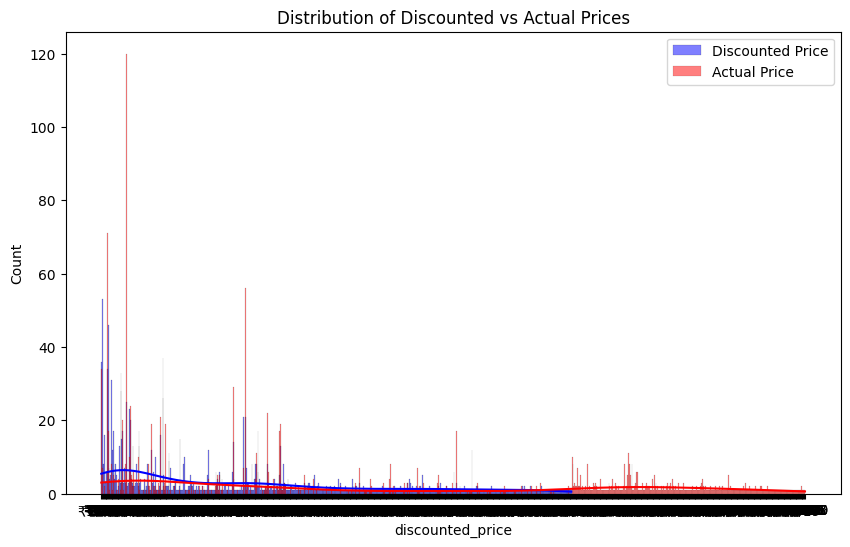

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['discounted_price'], color='blue', kde=True, label='Discounted Price')
sns.histplot(data['actual_price'], color='red', kde=True, label='Actual Price')
plt.legend()
plt.title('Distribution of Discounted vs Actual Prices')
plt.show()

## 4. How does the average discount percentage vary across categories?

In [54]:
data['discount_percentage'] = data['discount_percentage'].replace('%', '', regex=True).astype(float)

avg_discount_by_category = data.groupby('category')['discount_percentage'].mean()
print(avg_discount_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

## 5. What are the most popular product names?

In [48]:
popular_product_names = data['product_name'].value_counts().head(10)
print(popular_product_names)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                            

## 6. What are the most popular product keywords?

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['product_name'])

word_freq = X.toarray().sum(axis=0)
keywords = dict(zip(vectorizer.get_feature_names_out(), word_freq))

sorted_keywords = sorted(keywords.items(), key=lambda x: x[1], reverse=True)[:10]
print(sorted_keywords)


[('black', np.int64(530)), ('usb', np.int64(417)), ('cable', np.int64(414)), ('charging', np.int64(247)), ('type', np.int64(243)), ('fast', np.int64(212)), ('smart', np.int64(175)), ('white', np.int64(170)), ('tv', np.int64(152)), ('compatible', np.int64(146))]


## 7. What are the most popular product reviews?

In [50]:
popular_reviews = data['review_title'].value_counts().head(10)
print(popular_reviews)

review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good pro

## 8. What is the correlation between discounted_price and rating?

In [56]:
data['discounted_price'] = data['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

correlation = data[['discounted_price', 'rating']].corr()
print(correlation)

                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


## 9. What are the top 5 categories based on the highest ratings?

In [52]:
top_categories_by_rating = data.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories_by_rating)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


## 10. Identify any potential areas for improvement or optimization based on the data analysis

In [57]:
most_expensive_per_category = data.loc[data.groupby('category')['discounted_price'].idxmax()]

print(most_expensive_per_category[['category', 'product_name', 'discounted_price']])

                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
893   OfficeProducts|OfficePaperProducts|Paper|Stati...   
1004  OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
955   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  discounted_price  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...            2339.0  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...             294.0  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        

# EDA - 4

## 1) Data Reading and Cleaning (Handling Nulls and Duplicates)

In [59]:
import pandas as pd
data = pd.read_csv(r"C:\Users\hetvi\Downloads\spotify.csv")

print(data.isnull().sum())

data = data.dropna()  

print(data.duplicated().sum())

data = data.drop_duplicates()


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
27


## 2) Distribution of Popularity

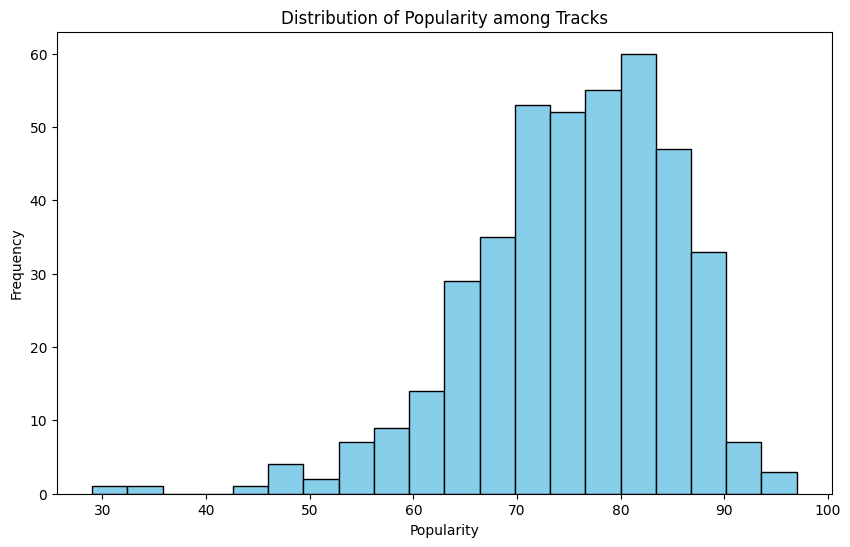

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['Popularity'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Popularity among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

## 3) Relationship Between Popularity and Duration

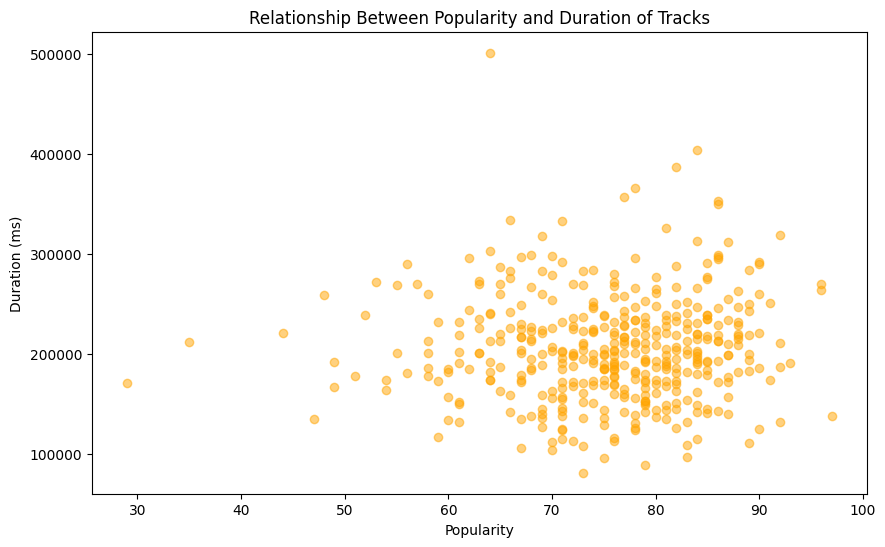

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Popularity'], data['Duration (ms)'], alpha=0.5, color='orange')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()


## 4) Artist with the Highest Number of Tracks

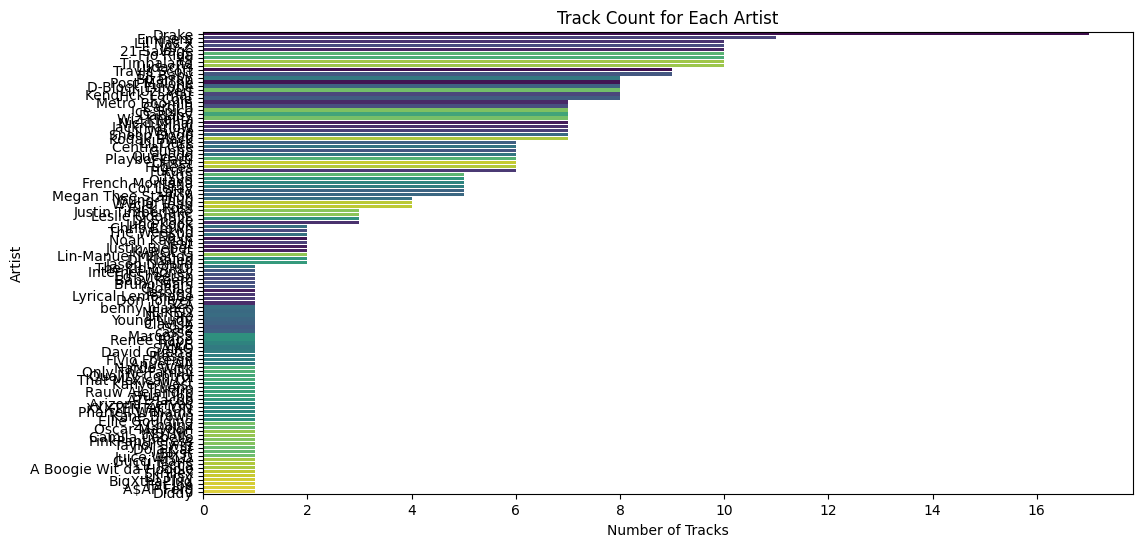

Artist with the highest number of tracks: Drake with 17 tracks


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

artist_count = data['Artist'].value_counts().reset_index()
artist_count.columns = ['Artist', 'Track Count']

plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Artist', order=data['Artist'].value_counts().index, hue='Artist', palette='viridis', legend=False)
plt.title('Track Count for Each Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

top_artist = artist_count.head(1)
print(f"Artist with the highest number of tracks: {top_artist['Artist'].iloc[0]} with {top_artist['Track Count'].iloc[0]} tracks")

## 5) Top 5 Least Popular Tracks

In [64]:
least_popular_tracks = data.sort_values(by='Popularity', ascending=True).head(5)

print("Top 5 Least Popular Tracks:")
for index, row in least_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Track Name: {row['Track Name']}, Popularity: {row['Popularity']}")


Top 5 Least Popular Tracks:
Artist: Pressa, Track Name: Attachments (feat. Coi Leray), Popularity: 29
Artist: Justin Bieber, Track Name: Intentions, Popularity: 35
Artist: French Montana, Track Name: Splash Brothers, Popularity: 44
Artist: Lil Baby, Track Name: On Me - Remix, Popularity: 47
Artist: Wyclef Jean, Track Name: 911 (feat. Mary J. Blige), Popularity: 48


## Q6: Among the top 5 most popular artists, which artist has the highest popularity on average?

In [68]:
avg_popularity_by_artist = data.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

top_5_artists = avg_popularity_by_artist.head(5)

print("Top 5 artists with highest average popularity:")
print(top_5_artists)

top_artist = top_5_artists.idxmax()
top_popularity = top_5_artists.max()
print(f"\nThe artist with the highest average popularity among the top 5 is {top_artist} with an average popularity of {top_popularity}")

Top 5 artists with highest average popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

The artist with the highest average popularity among the top 5 is cassö with an average popularity of 92.0


## Q7: For the top 5 most popular artists, what are their most popular tracks?

In [73]:
top_5_artists_tracks = data[data['Artist'].isin(top_5_artists.index)]

most_popular_tracks = top_5_artists_tracks.loc[top_5_artists_tracks.groupby('Artist')['Popularity'].idxmax()]

print("Most popular tracks for the top 5 artists:")
for _, row in most_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Track: {row['Track Name']}, Popularity: {row['Popularity']}")

Most popular tracks for the top 5 artists:
Artist: David Guetta, Track: Baby Don't Hurt Me, Popularity: 87
Artist: Travis Scott, Track: FE!N (feat. Playboi Carti), Popularity: 93
Artist: Trueno, Track: Mamichula - con Nicki Nicole, Popularity: 89
Artist: cassö, Track: Prada, Popularity: 92
Artist: ¥$, Track: CARNIVAL, Popularity: 96


## Q8: Visualize relationships between multiple numerical variables simultaneously using a pair plot

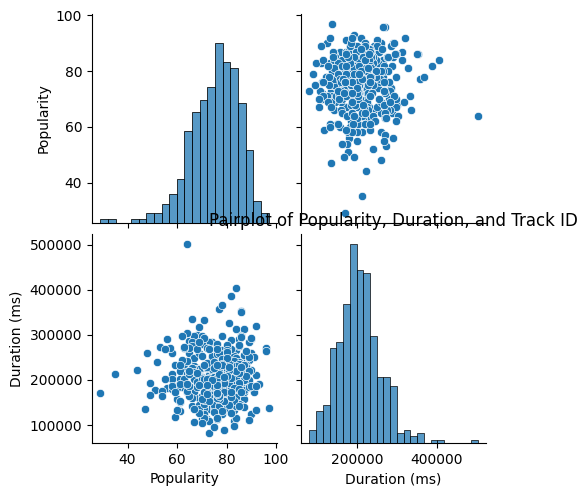

In [70]:
sns.pairplot(data[['Popularity', 'Duration (ms)', 'Track ID']])  # You can select relevant numerical columns
plt.title('Pairplot of Popularity, Duration, and Track ID')
plt.show()

## Q9: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

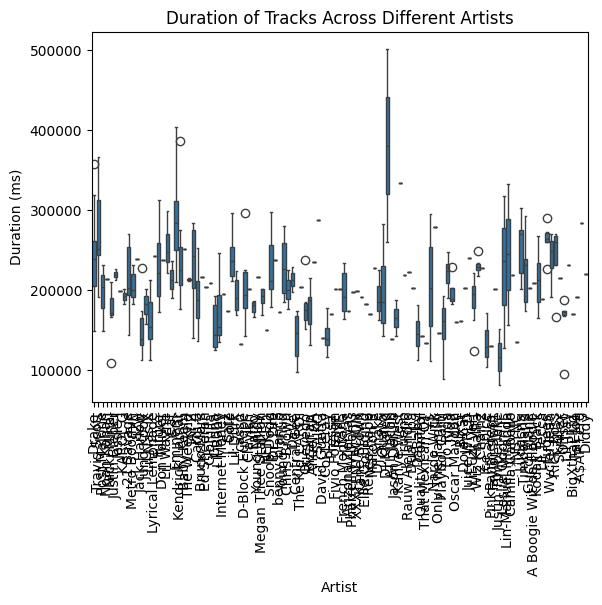

In [76]:
sns.boxplot(data=data, x='Artist', y='Duration (ms)')
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap
plt.title('Duration of Tracks Across Different Artists')
plt.show()


## Q10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

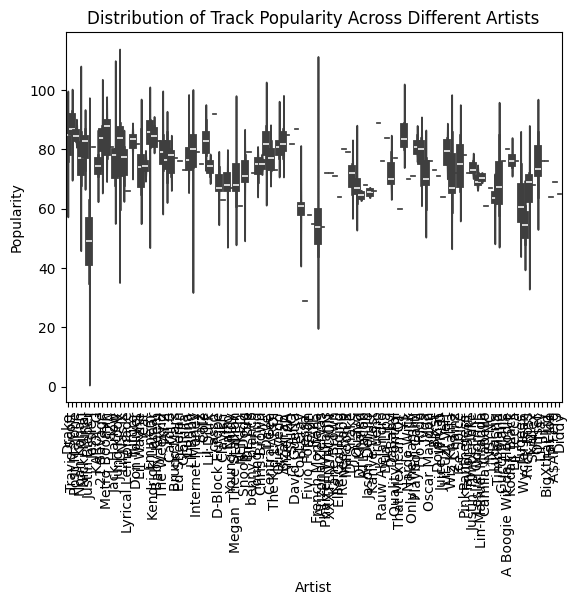

In [78]:
sns.violinplot(data=data, x='Artist', y='Popularity')
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap
plt.title('Distribution of Track Popularity Across Different Artists')
plt.show()
